<a href="https://colab.research.google.com/github/paulocaj/AnaliseStoreAPI/blob/main/AnaliseStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas
import requests # acessar arquivo
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [ ]:
# Acessando dados da Fake Store API.

url = 'https://fakestoreapi.com/products'
json_url = requests.get(url)
product = json.loads(json_url.text)


url = 'https://fakestoreapi.com/users'
json_url = requests.get(url)
user = json.loads(json_url.text)

In [ ]:
# Criando o df
df_product = pd.DataFrame(product)
df_user = pd.DataFrame(user)

# Removendo valores nulos e vazios
df_product_cleaned = df_product.dropna()
df_user_cleaned = df_user.dropna()


In [ ]:
df_product

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"
5,6,Solid Gold Petite Micropave,168.00,Satisfaction Guaranteed. Return or exchange an...,jewelery,https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...,"{'rate': 3.9, 'count': 70}"
6,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,jewelery,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,"{'rate': 3, 'count': 400}"
7,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,jewelery,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,"{'rate': 1.9, 'count': 100}"
8,9,WD 2TB Elements Portable External Hard Drive -...,64.00,USB 3.0 and USB 2.0 Compatibility Fast data tr...,electronics,https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...,"{'rate': 3.3, 'count': 203}"
9,10,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,109.00,"Easy upgrade for faster boot up, shutdown, app...",electronics,https://fakestoreapi.com/img/61U7T1koQqL._AC_S...,"{'rate': 2.9, 'count': 470}"


In [ ]:
df_user

,address,id,email,username,password,name,phone,__v
0,"{'geolocation': {'lat': '-37.3159', 'long': '8...",1,john@gmail.com,johnd,m38rmF$,"{'firstname': 'john', 'lastname': 'doe'}",1-570-236-7033,0
1,"{'geolocation': {'lat': '-37.3159', 'long': '8...",2,morrison@gmail.com,mor_2314,83r5^_,"{'firstname': 'david', 'lastname': 'morrison'}",1-570-236-7033,0
2,"{'geolocation': {'lat': '40.3467', 'long': '-3...",3,kevin@gmail.com,kevinryan,kev02937@,"{'firstname': 'kevin', 'lastname': 'ryan'}",1-567-094-1345,0
3,"{'geolocation': {'lat': '50.3467', 'long': '-2...",4,don@gmail.com,donero,ewedon,"{'firstname': 'don', 'lastname': 'romer'}",1-765-789-6734,0
4,"{'geolocation': {'lat': '40.3467', 'long': '-4...",5,derek@gmail.com,derek,jklg*_56,"{'firstname': 'derek', 'lastname': 'powell'}",1-956-001-1945,0
5,"{'geolocation': {'lat': '20.1677', 'long': '-1...",6,david_r@gmail.com,david_r,3478*#54,"{'firstname': 'david', 'lastname': 'russell'}",1-678-345-9856,0
6,"{'geolocation': {'lat': '10.3456', 'long': '20...",7,miriam@gmail.com,snyder,f238&@*$,"{'firstname': 'miriam', 'lastname': 'snyder'}",1-123-943-0563,0
7,"{'geolocation': {'lat': '50.3456', 'long': '10...",8,william@gmail.com,hopkins,William56$hj,"{'firstname': 'william', 'lastname': 'hopkins'}",1-478-001-0890,0
8,"{'geolocation': {'lat': '40.12456', 'long': '2...",9,kate@gmail.com,kate_h,kfejk@*_,"{'firstname': 'kate', 'lastname': 'hale'}",1-678-456-1934,0
9,"{'geolocation': {'lat': '30.24788', 'long': '-...",10,jimmie@gmail.com,jimmie_k,klein*#%*,"{'firstname': 'jimmie', 'lastname': 'klein'}",1-104-001-4567,0


In [ ]:
# 1. Analisando a estrutura dos dados
print("Estrutura dos dados do produto:")
print(df_product.info())
print("\n")

print("Estrutura dos dados do usuário:")
print(df_user.info())
print("\n")

Estrutura dos dados do produto:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB
None


Estrutura dos dados do usuário:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   10 non-null     object
 1   id        10 non-null     int64 
 2   email     10 non-null     object
 3   username  10 non-null     object
 4   password  10 non-null     object
 5   name      10 no

In [ ]:
# 2. Exibindo algumas amostras de cada conjunto de dados
print("Amostras dos dados do produto:")
print(df_product.head())
print("\n")

print("Amostras dos dados do usuário:")
print(df_user.head())
print("\n")

Amostras dos dados do produto:
   id                                              title   price  \
0   1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1   2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2   3                                 Mens Cotton Jacket   55.99   
3   4                               Mens Casual Slim Fit   15.99   
4   5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   

                                         description        category  \
0  Your perfect pack for everyday use and walks i...  men's clothing   
1  Slim-fitting style, contrast raglan long sleev...  men's clothing   
2  great outerwear jackets for Spring/Autumn/Wint...  men's clothing   
3  The color could be slightly different between ...  men's clothing   
4  From our Legends Collection, the Naga was insp...        jewelery   

                                               image  \
0  https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...   
1  https://fake

In [ ]:
# 3. Verificando o tipo de cada variável
print("Tipos de dados do produto:")
print(df_product.dtypes)
print("\n")

print("Tipos de dados do usuário:")
print(df_user.dtypes)
print("\n")

Tipos de dados do produto:
id               int64
title           object
price          float64
description     object
category        object
image           object
rating          object
dtype: object


Tipos de dados do usuário:
address     object
id           int64
email       object
username    object
password    object
name        object
phone       object
__v          int64
dtype: object




In [ ]:
# 4. Análisae exploratória básica
print("Quantidade de produtos por categoria:")
print(df_product['category'].value_counts())
print("\n")

Quantidade de produtos por categoria:
category
electronics         6
women's clothing    6
men's clothing      4
jewelery            4
Name: count, dtype: int64




In [ ]:
# Estatísticas descritivas das colunas numéricas
print("Estatísticas descritivas das colunas numéricas dos produtos:")
print(df_product.describe())
print("\n")

Estatísticas descritivas das colunas numéricas dos produtos:
             id       price
count  20.00000   20.000000
mean   10.50000  162.046000
std     5.91608  272.220532
min     1.00000    7.950000
25%     5.75000   15.240000
50%    10.50000   56.490000
75%    15.25000  110.962500
max    20.00000  999.990000




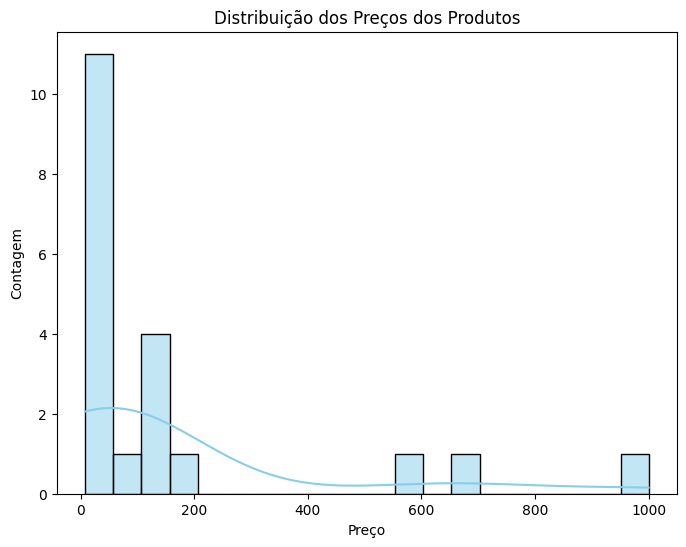

In [ ]:
# Criando um histograma para a distribuição dos preços dos produtos
plt.figure(figsize=(8, 6))
sns.histplot(df_product['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

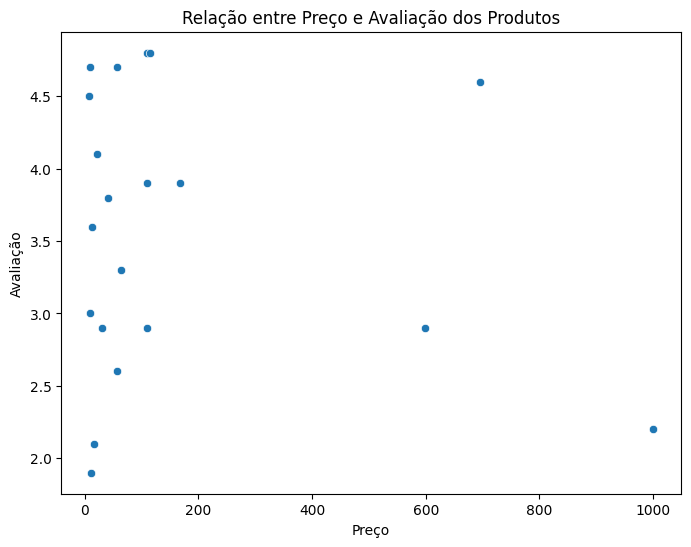

In [ ]:
# Análise da relação entre preço e avaliação
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y=df_product['rating'].apply(lambda x: x['rate']), data=df_product)
plt.title('Relação entre Preço e Avaliação dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Avaliação')
plt.show()

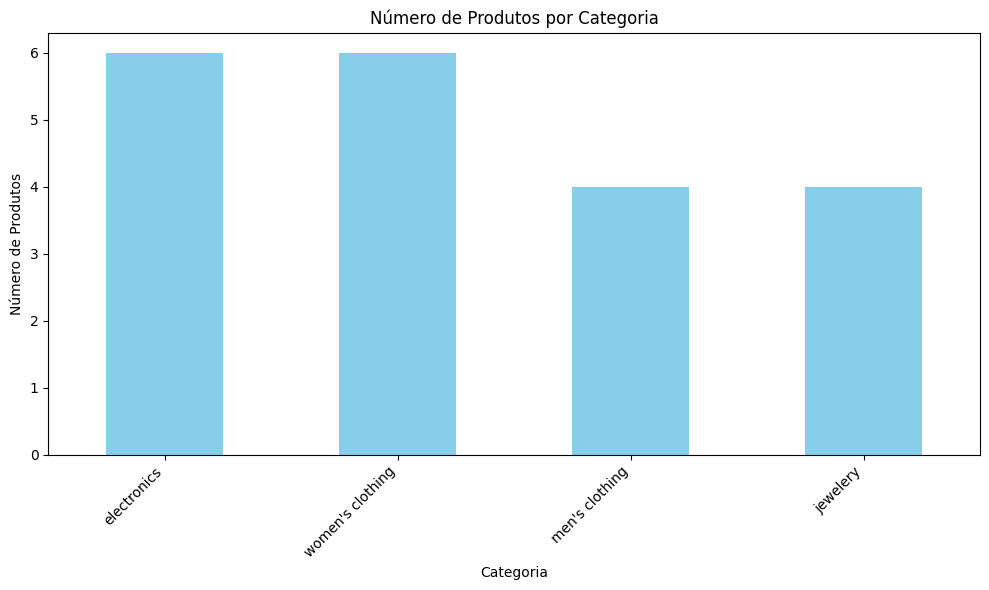

In [ ]:
# Contagem de produtos por categoria
category_counts = df_product['category'].value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Produtos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()